In [1]:
# %load main.py
   
import pandas as pd
import numpy as np
import lib.load as load
import data_cleaning as dc
import lib.df_info as i
import lib.func as f

df = load.load_data()
df_transactions = df[0]
#df_new_cust_list = df[1]
df_demographic = df[2]
df_address = df[3]

try:
    df_demographic = dc.clean_demographic(df_demographic).reset_index(drop=True)
    df_address = dc.clean_address(df_address).reset_index(drop=True)
    df_transactions = dc.clean_transactions(df_transactions).reset_index(drop=True)
except Exception:
    print('ERROR.')
    

/Users/oksana_kaledina/Documents/5_PORTFOLIO/KPMG/source/data.xlsx


/Users/oksana_kaledina/Documents/5_PORTFOLIO/KPMG/data_cleaning.py:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['age'] = df['DOB'].apply(lambda x : (pd.datetime.now().year - x.year))


In [2]:
dff = f.merge_df_inner(df_demographic,df_transactions,df_address)

/var/folders/50/wfcv_4zx0917yzh38hjkl9480000gn/T/ipykernel_17041/1209503046.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(), annot = True)


<function matplotlib.pyplot.show(close=None, block=None)>

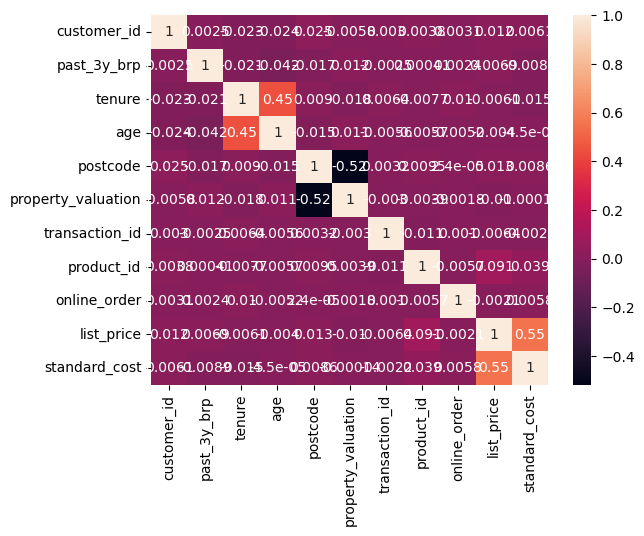

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dff.corr(), annot = True)

plt.show


/Users/oksana_kaledina/miniforge3/envs/env-01/lib/python3.9/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


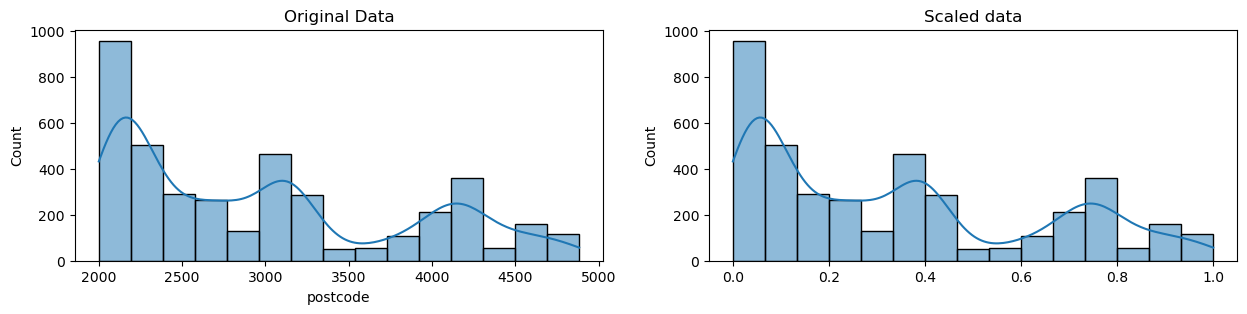

In [19]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)


original_data = df_address['postcode']

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

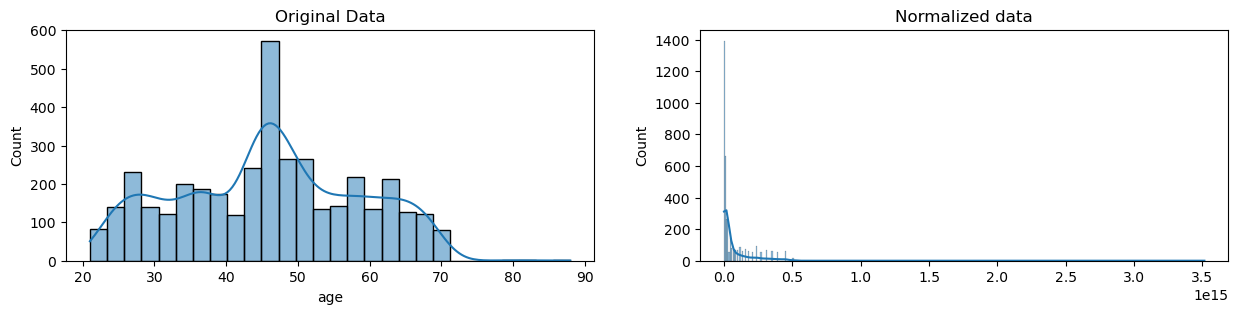

In [20]:

original_data = df_demographic['age']

# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()